In [1]:
# import Python libraries
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import sympy as sym
from sympy.plotting import plot
import pandas as pd
from IPython.display import display
from IPython.core.display import Math
from scipy.optimize import minimize

1. Find the extrema in the function $f(x)=x^3-7.5x^2+18x-10$ analytically and determine if they are minimum or maximum.

In [2]:
x = sym.symbols('x')
f = x**3 - 7.5*x**2 + 18*x - 10
display(Math(sym.latex('f(x) = ') + sym.latex(f)))

fdiff = sym.expand(sym.diff(f, x))
display(Math(sym.latex('\dot f(x) = ') + sym.latex(fdiff)))

roots = sym.solve(fdiff, x)
display(Math(sym.latex('Roots:') + sym.latex(roots)))

fdiff2 = sym.expand(sym.diff(fdiff, x))
display(Math(sym.latex('\ddot f(x) = ') + sym.latex(fdiff2)))

f2 = fdiff2.subs(x,2)
display(Math(sym.latex('\ddot f(2) = ') + sym.latex(f2)))

f3 = fdiff2.subs(x,3)
display(Math(sym.latex('\ddot f(3) = ') + sym.latex(f3)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

f(2) is a maximum and f(3) is a minimum

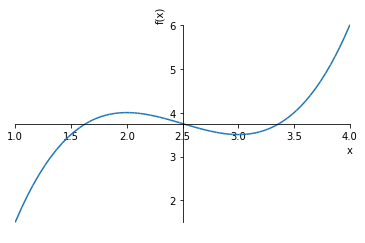

In [3]:
plot(f,(x,1,4),xlabel= 'x',ylabel = 'f(x)')

2. Find the minimum in the $f(x)=x^3-7.5x^2+18x-10$ using the gradient descent algorithm.  

In [4]:
cur_x = 2.001             
gamma = 0.01            # step size multiplier
precision = 0.00001
step_size = 1           # initial step size
max_iters = 10000       # maximum number of iterations
iters = 0               # iteration counter


f  = lambda x: x**3 - 7.5*x**2 + 18*x - 10  # lambda function for f(x)
df = lambda x: 3*x**2 - 15*x + 18   # lambda function for the gradient of f(x)

while (step_size > precision) & (iters < max_iters):
    prev_x = cur_x
    cur_x -= gamma*df(prev_x)
    step_size = abs(cur_x - prev_x)
    iters+=1

print('True local minimum at {} with function value {}.'.format(3, f(3)))
print('Local minimum by gradient descent at {} with function value {}.'.format(cur_x, f(cur_x)))

True local minimum at 3 with function value 3.5.
Local minimum by gradient descent at 2.9996813387653187 with function value 3.500000152285125.


3. Regarding the distribution problem for the elbow muscles presented in this text:  
    a. Test different initial values for the optimization.  
    b. Test other values for the elbow angle where the results are likely to change.   

In [5]:
def cf_f1(x):
    """Cost function: sum of forces."""  
    return x[0] + x[1] + x[2]

def cf_f2(x):
    """Cost function: sum of forces squared."""
    return x[0]**2 + x[1]**2 + x[2]**2

def cf_fpcsa2(x, a):
    """Cost function: sum of squared muscle stresses."""
    return (x[0]/a[0])**2 + (x[1]/a[1])**2 + (x[2]/a[2])**2

def cf_fmmax3(x, m):
    """Cost function: sum of cubic forces normalized by moments."""
    return (x[0]/m[0])**3 + (x[1]/m[1])**3 + (x[2]/m[2])**3
def cf_f1d(x):
    """Derivative of cost function: sum of forces."""
    dfdx0 = 1
    dfdx1 = 1
    dfdx2 = 1
    return np.array([dfdx0, dfdx1, dfdx2])

def cf_f2d(x):
    """Derivative of cost function: sum of forces squared."""
    dfdx0 = 2*x[0]
    dfdx1 = 2*x[1]
    dfdx2 = 2*x[2]
    return np.array([dfdx0, dfdx1, dfdx2])

def cf_fpcsa2d(x, a):
    """Derivative of cost function: sum of squared muscle stresses."""
    dfdx0 = 2*x[0]/a[0]**2
    dfdx1 = 2*x[1]/a[1]**2
    dfdx2 = 2*x[2]/a[2]**2
    return np.array([dfdx0, dfdx1, dfdx2])

def cf_fmmax3d(x, m):
    """Derivative of cost function: sum of cubic forces normalized by moments."""
    dfdx0 = 3*x[0]**2/m[0]**3
    dfdx1 = 3*x[1]**2/m[1]**3
    dfdx2 = 3*x[2]**2/m[2]**3
    return np.array([dfdx0, dfdx1, dfdx2])

In [6]:
# time elbow_flexion BIClong BICshort BRA
r_ef = np.loadtxt('./../../../data/r_elbowflexors.mot', skiprows=7)
f_ef = np.loadtxt('./../../../data/f_elbowflexors.mot', skiprows=7)

m_ef = r_ef*1
m_ef[:, 2:] = r_ef[:, 2:]*f_ef[:, 2:]

a_ef = np.array([624.3, 435.56, 987.26])/50  # 50 N/cm2

In [7]:
M = 20  # desired torque at the elbow
iang = 69  # which will give the closest value to 90 degrees


r  = r_ef[iang, 2:]
f0 = f_ef[iang, 2:]
a  = a_ef
m  = m_ef[iang, 2:]
x0 = f_ef[iang, 2:]/235  # far from the correct answer for the sum of torques
print('M =', M)
print('x0 =', x0)
print('r * x0 =', np.sum(r*x0))

bnds = ((0, f0[0]), (0, f0[1]), (0, f0[2]))


M = 20
x0 = [2.44736654 1.5446698  3.8147662 ]
r * x0 = 0.28178742323694983


In [8]:
# use this in combination with the parameter bounds:
cons = ({'type': 'eq',
         'fun' : lambda x, r, f0, M: np.array([r[0]*x[0] + r[1]*x[1] + r[2]*x[2] - M]), 
         'jac' : lambda x, r, f0, M: np.array([r[0], r[1], r[2]]), 'args': (r, f0, M)})
# to enter everything as constraints:
cons = ({'type': 'eq',
         'fun' : lambda x, r, f0, M: np.array([r[0]*x[0] + r[1]*x[1] + r[2]*x[2] - M]), 
         'jac' : lambda x, r, f0, M: np.array([r[0], r[1], r[2]]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: f0[0]-x[0],
         'jac' : lambda x, r, f0, M: np.array([-1, 0, 0]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: f0[1]-x[1],
         'jac' : lambda x, r, f0, M: np.array([0, -1, 0]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: f0[2]-x[2],
         'jac' : lambda x, r, f0, M: np.array([0, 0, -1]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: x[0],
         'jac' : lambda x, r, f0, M: np.array([1, 0, 0]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: x[1],
         'jac' : lambda x, r, f0, M: np.array([0, 1, 0]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: x[2],
         'jac' : lambda x, r, f0, M: np.array([0, 0, 1]), 'args': (r, f0, M)})

In [9]:
f1r = minimize(fun=cf_f1, x0=x0, args=(), jac=cf_f1d,
               constraints=cons, method='SLSQP',
               options={'disp': True})
f2r = minimize(fun=cf_f2, x0=x0, args=(), jac=cf_f2d,
               constraints=cons, method='SLSQP',
               options={'disp': True})
fpcsa2r = minimize(fun=cf_fpcsa2, x0=x0, args=(a,), jac=cf_fpcsa2d,
                   constraints=cons, method='SLSQP',
                   options={'disp': True})
fmmax3r = minimize(fun=cf_fmmax3, x0=x0, args=(m,), jac=cf_fmmax3d,
                   constraints=cons, method='SLSQP',
                   options={'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 409.59266009952
            Iterations: 7
            Function evaluations: 7
            Gradient evaluations: 7
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 75657.38479127164
            Iterations: 4
            Function evaluations: 6
            Gradient evaluations: 4
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 529.9639777695752
            Iterations: 11
            Function evaluations: 11
            Gradient evaluations: 11
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1075.1388931095582
            Iterations: 12
            Function evaluations: 13
            Gradient evaluations: 12


In [10]:
dat = np.vstack((np.around(r*100,1), np.around(a,1), np.around(f0,0), np.around(m,1)))
opt = np.around(np.vstack((f1r.x, f2r.x, fpcsa2r.x, fmmax3r.x)), 1)
er = ['-', '-', '-', '-',
      np.sum(r*f1r.x)-M, np.sum(r*f2r.x)-M, np.sum(r*fpcsa2r.x)-M, np.sum(r*fmmax3r.x)-M]
data = np.vstack((np.vstack((dat, opt)).T, er)).T

rows = ['$\text{Moment arm}\;[cm]$', '$pcsa\;[cm^2]$', '$F_{max}\;[N]$', '$M_{max}\;[Nm]$',
        '$\sum F_i$', '$\sum F_i^2$', '$\sum(F_i/pcsa_i)^2$', '$\sum(F_i/M_{max,i})^3$']
cols = ['Biceps long head', 'Biceps short head', 'Brachialis', 'Error in M']
df = pd.DataFrame(data, index=rows, columns=cols)
print('\nComparison of different cost functions for solving the distribution problem')
df


Comparison of different cost functions for solving the distribution problem


,Biceps long head,Biceps short head,Brachialis,Error in M
$\text{Moment arm}\;[cm]$,4.9,4.9,2.3,-
$pcsa\;[cm^2]$,12.5,8.7,19.7,-
$F_{max}\;[N]$,575.0,363.0,896.0,-
$M_{max}\;[Nm]$,28.1,17.7,20.4,-
$\sum F_i$,205.2,204.3,-0.0,0.0
$\sum F_i^2$,184.7,184.7,86.1,-3.552713678800501e-15
$\sum(F_i/pcsa_i)^2$,201.7,98.2,235.2,0.0
"$\sum(F_i/M_{max,i})^3$",241.1,120.9,102.0,-3.552713678800501e-15


In [11]:
M = 20  # desired torque at the elbow
iang = 35  # which will give the closest value to 90 degrees


r  = r_ef[iang, 2:]
f0 = f_ef[iang, 2:]
a  = a_ef
m  = m_ef[iang, 2:]
x0 = f_ef[iang, 2:]/235  # far from the correct answer for the sum of torques
print('M =', M)
print('x0 =', x0)
print('r * x0 =', np.sum(r*x0))

bnds = ((0, f0[0]), (0, f0[1]), (0, f0[2]))

M = 20
x0 = [2.65687365 1.84300054 4.17723792]
r * x0 = 0.20841024709802292


In [12]:
f1r = minimize(fun=cf_f1, x0=x0, args=(), jac=cf_f1d,
               constraints=cons, method='SLSQP',
               options={'disp': True})

f2r = minimize(fun=cf_f2, x0=x0, args=(), jac=cf_f2d,
               constraints=cons, method='SLSQP',
               options={'disp': True})

fpcsa2r = minimize(fun=cf_fpcsa2, x0=x0, args=(a,), jac=cf_fpcsa2d,
                   constraints=cons, method='SLSQP',
                   options={'disp': True})

fmmax3r = minimize(fun=cf_fmmax3, x0=x0, args=(m,), jac=cf_fmmax3d,
                   constraints=cons, method='SLSQP',
                   options={'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 409.59266009953393
            Iterations: 7
            Function evaluations: 7
            Gradient evaluations: 7
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 75657.3847912717
            Iterations: 4
            Function evaluations: 6
            Gradient evaluations: 4
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 529.9639777695751
            Iterations: 11
            Function evaluations: 11
            Gradient evaluations: 11
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2330.3142947977667
            Iterations: 10
            Function evaluations: 10
            Gradient evaluations: 10


In [13]:
dat = np.vstack((np.around(r*100,1), np.around(a,1), np.around(f0,0), np.around(m,1)))
opt = np.around(np.vstack((f1r.x, f2r.x, fpcsa2r.x, fmmax3r.x)), 1)
er = ['-', '-', '-', '-',
      np.sum(r*f1r.x)-M, np.sum(r*f2r.x)-M, np.sum(r*fpcsa2r.x)-M, np.sum(r*fmmax3r.x)-M]
data = np.vstack((np.vstack((dat, opt)).T, er)).T

rows = ['$\text{Moment arm}\;[cm]$', '$pcsa\;[cm^2]$', '$F_{max}\;[N]$', '$M_{max}\;[Nm]$',
        '$\sum F_i$', '$\sum F_i^2$', '$\sum(F_i/pcsa_i)^2$', '$\sum(F_i/M_{max,i})^3$']
cols = ['Biceps long head', 'Biceps short head', 'Brachialis', 'Error in M']
df = pd.DataFrame(data, index=rows, columns=cols)
print('\nComparison of different cost functions for solving the distribution problem')
df


Comparison of different cost functions for solving the distribution problem


,Biceps long head,Biceps short head,Brachialis,Error in M
$\text{Moment arm}\;[cm]$,3.4,3.4,1.3,-
$pcsa\;[cm^2]$,12.5,8.7,19.7,-
$F_{max}\;[N]$,624.0,433.0,982.0,-
$M_{max}\;[Nm]$,21.5,14.9,12.5,-
$\sum F_i$,205.2,204.4,0.0,-5.875094718302668
$\sum F_i^2$,184.7,184.7,86.1,-6.162588012268191
$\sum(F_i/pcsa_i)^2$,201.7,98.2,235.2,-6.660232419069558
"$\sum(F_i/M_{max,i})^3$",238.3,137.7,72.1,-6.115622167519737


4. In an experiment to estimate forces of the elbow flexors, through inverse dynamics it was found an elbow flexor moment of 10 Nm.  
Consider the following data for maximum force (F0), moment arm (r), and pcsa (A) of the brachialis, brachioradialis, and biceps brachii muscles: F0 (N): 1000, 250, 700; r (cm): 2, 5, 4; A (cm$^2$): 33, 8, 23, respectively (data from Robertson et al. (2013)).  
    a. Use static optimization to estimate the muscle forces.  
    b. Test the robustness of the results using different initial values for the muscle forces.  
    c. Compare the results for different cost functions.

In [14]:
M = 10  # desired torque at the elbow

f0 = np.array([1000, 250, 700])
r  = np.array([2, 5, 4])
a  = np.array([33, 8, 23])

m = r*f0
x0 = f0*10  # far from the correct answer for the sum of torques
print('M =', M)
print('x0 =', x0)
print('r * x0 =', np.sum(r*x0))

bnds = ((0, f0[0]), (0, f0[1]), (0, f0[2]))

M = 10
x0 = [10000  2500  7000]
r * x0 = 60500


In [15]:
# use this in combination with the parameter bounds:
cons = ({'type': 'eq',
         'fun' : lambda x, r, f0, M: np.array([r[0]*x[0] + r[1]*x[1] + r[2]*x[2] - M]), 
         'jac' : lambda x, r, f0, M: np.array([r[0], r[1], r[2]]), 'args': (r, f0, M)})
# to enter everything as constraints:
cons = ({'type': 'eq',
         'fun' : lambda x, r, f0, M: np.array([r[0]*x[0] + r[1]*x[1] + r[2]*x[2] - M]), 
         'jac' : lambda x, r, f0, M: np.array([r[0], r[1], r[2]]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: f0[0]-x[0],
         'jac' : lambda x, r, f0, M: np.array([-1, 0, 0]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: f0[1]-x[1],
         'jac' : lambda x, r, f0, M: np.array([0, -1, 0]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: f0[2]-x[2],
         'jac' : lambda x, r, f0, M: np.array([0, 0, -1]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: x[0],
         'jac' : lambda x, r, f0, M: np.array([1, 0, 0]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: x[1],
         'jac' : lambda x, r, f0, M: np.array([0, 1, 0]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: x[2],
         'jac' : lambda x, r, f0, M: np.array([0, 0, 1]), 'args': (r, f0, M)})

In [16]:
f1r = minimize(fun=cf_f1, x0=x0, args=(), jac=cf_f1d,
               constraints=cons, method='SLSQP',
               options={'disp': True})
f2r = minimize(fun=cf_f2, x0=x0, args=(), jac=cf_f2d,
               constraints=cons, method='SLSQP',
               options={'disp': True})
fpcsa2r = minimize(fun=cf_fpcsa2, x0=x0, args=(a,), jac=cf_fpcsa2d,
                   constraints=cons, method='SLSQP',
                   options={'disp': True})
fmmax3r = minimize(fun=cf_fmmax3, x0=x0, args=(m,), jac=cf_fmmax3d,
                   constraints=cons, method='SLSQP',
                   options={'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.9999999999999882
            Iterations: 5
            Function evaluations: 5
            Gradient evaluations: 5
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.2222222227876145
            Iterations: 6
            Function evaluations: 7
            Gradient evaluations: 6
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.006934901666808587
            Iterations: 14
            Function evaluations: 14
            Gradient evaluations: 14
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.5623481833790065e-08
            Iterations: 2
            Function evaluations: 3
            Gradient evaluations: 2


In [17]:
dat = np.vstack((np.around(r*100,1), np.around(a,1), np.around(f0,0), np.around(m,1)))
opt = np.around(np.vstack((f1r.x, f2r.x, fpcsa2r.x, fmmax3r.x)), 1)
er = ['-', '-', '-', '-',
      np.sum(r*f1r.x)-M, np.sum(r*f2r.x)-M, np.sum(r*fpcsa2r.x)-M, np.sum(r*fmmax3r.x)-M]
data = np.vstack((np.vstack((dat, opt)).T, er)).T

rows = ['$\text{Moment arm}\;[cm]$', '$pcsa\;[cm^2]$', '$F_{max}\;[N]$', '$M_{max}\;[Nm]$',
        '$\sum F_i$', '$\sum F_i^2$', '$\sum(F_i/pcsa_i)^2$', '$\sum(F_i/M_{max,i})^3$']
cols = ['Biceps long head', 'Biceps short head', 'Brachialis', 'Error in M']
df = pd.DataFrame(data, index=rows, columns=cols)
print('\nComparison of different cost functions for solving the distribution problem')
df


Comparison of different cost functions for solving the distribution problem


,Biceps long head,Biceps short head,Brachialis,Error in M
$\text{Moment arm}\;[cm]$,200.0,500.0,400.0,-
$pcsa\;[cm^2]$,33.0,8.0,23.0,-
$F_{max}\;[N]$,1000.0,250.0,700.0,-
$M_{max}\;[Nm]$,2000.0,1250.0,2800.0,-
$\sum F_i$,-0.0,2.0,-0.0,-1.7763568394002505e-15
$\sum F_i^2$,0.4,1.1,0.9,0.0
$\sum(F_i/pcsa_i)^2$,1.5,0.2,1.5,0.0
"$\sum(F_i/M_{max,i})^3$",5.0,0.0,0.0,0.0


In [18]:
M = 10  # desired torque at the elbow

f0 = np.array([1000, 250, 700])
r  = np.array([2, 5, 4])
a  = np.array([33, 8, 23])

m = r*f0
x0 = f0/235  # far from the correct answer for the sum of torques
print('M =', M)
print('x0 =', x0)
print('r * x0 =', np.sum(r*x0))

bnds = ((0, f0[0]), (0, f0[1]), (0, f0[2]))

M = 10
x0 = [4.25531915 1.06382979 2.9787234 ]
r * x0 = 25.744680851063826


In [19]:
f1r = minimize(fun=cf_f1, x0=x0, args=(), jac=cf_f1d,
               constraints=cons, method='SLSQP',
               options={'disp': True})
f2r = minimize(fun=cf_f2, x0=x0, args=(), jac=cf_f2d,
               constraints=cons, method='SLSQP',
               options={'disp': True})
fpcsa2r = minimize(fun=cf_fpcsa2, x0=x0, args=(a,), jac=cf_fpcsa2d,
                   constraints=cons, method='SLSQP',
                   options={'disp': True})
fmmax3r = minimize(fun=cf_fmmax3, x0=x0, args=(m,), jac=cf_fmmax3d,
                   constraints=cons, method='SLSQP',
                   options={'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.000000000000004
            Iterations: 6
            Function evaluations: 6
            Gradient evaluations: 6
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.222222231479426
            Iterations: 7
            Function evaluations: 7
            Gradient evaluations: 7
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.006934812760199668
            Iterations: 11
            Function evaluations: 11
            Gradient evaluations: 11
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.177724714444361e-09
            Iterations: 1
            Function evaluations: 2
            Gradient evaluations: 1


In [20]:
dat = np.vstack((np.around(r*100,1), np.around(a,1), np.around(f0,0), np.around(m,1)))
opt = np.around(np.vstack((f1r.x, f2r.x, fpcsa2r.x, fmmax3r.x)), 1)
er = ['-', '-', '-', '-',
      np.sum(r*f1r.x)-M, np.sum(r*f2r.x)-M, np.sum(r*fpcsa2r.x)-M, np.sum(r*fmmax3r.x)-M]
data = np.vstack((np.vstack((dat, opt)).T, er)).T

rows = ['$\text{Moment arm}\;[cm]$', '$pcsa\;[cm^2]$', '$F_{max}\;[N]$', '$M_{max}\;[Nm]$',
        '$\sum F_i$', '$\sum F_i^2$', '$\sum(F_i/pcsa_i)^2$', '$\sum(F_i/M_{max,i})^3$']
cols = ['Biceps long head', 'Biceps short head', 'Brachialis', 'Error in M']
df = pd.DataFrame(data, index=rows, columns=cols)
print('\nComparison of different cost functions for solving the distribution problem')
df


Comparison of different cost functions for solving the distribution problem


,Biceps long head,Biceps short head,Brachialis,Error in M
$\text{Moment arm}\;[cm]$,200.0,500.0,400.0,-
$pcsa\;[cm^2]$,33.0,8.0,23.0,-
$F_{max}\;[N]$,1000.0,250.0,700.0,-
$M_{max}\;[Nm]$,2000.0,1250.0,2800.0,-
$\sum F_i$,0.0,2.0,0.0,0.0
$\sum F_i^2$,0.4,1.1,0.9,0.0
$\sum(F_i/pcsa_i)^2$,1.5,0.2,1.5,3.552713678800501e-15
"$\sum(F_i/M_{max,i})^3$",3.2,0.0,0.9,1.0658141036401503e-14
